<a href="https://colab.research.google.com/github/SlaveWilson/tensorflow/blob/main/Module_5_1_Convolutional_Neural_Network_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


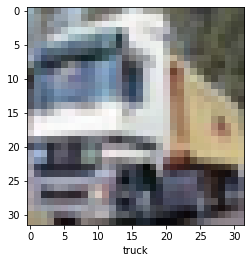

In [4]:
IMG_INDEX = 1
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 3ms/step - loss: 1.7347 - accuracy: 0.3582 - val_loss: 1.2853 - val_accuracy: 0.5427
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1639 - accuracy: 0.5865 - val_loss: 1.1119 - val_accuracy: 0.6140
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0036 - accuracy: 0.6461 - val_loss: 1.0258 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8978 - accuracy: 0.6846 - val_loss: 0.9502 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8190 - accuracy: 0.7111 - val_loss: 0.8883 - val_accuracy: 0.6916
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7668 - accuracy: 0.7316 - val_loss: 0.8553 - val_accuracy: 0.7081
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7114 - accuracy: 0.7511 - val_loss: 0.9057 - val_accuracy

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - loss: 0.8339 - accuracy: 0.7224
0.7224000096321106
